In [1]:
compounds = ['momilactoneB', 'afrormosin', 'diaboline', 'vincamine', 'falcarindiol', 'lycosantalonol', 'brucine']

In [2]:
import pandas as pd

base_paths = {
    "READRetro Retroformer": "./retroformer_biochem_results/",
    "TL 700 Epochs 1e-5": "./retroformer_transfer_learning_700_10times_lowerLR_results/",
    "TL 700 Epochs 1e-6": "./retroformer_transfer_learning_700_100times_lowerLR_results/",
    "TL 700 Epochs 1e-7": "./retroformer_transfer_learning_700_1000times_lowerLR_results/",
    "TL 1000 Epochs 1e-5": "./retroformer_transfer_learning_1000_10times_lowerLR_results/",
    "TL 1000 Epochs 1e-6": "./retroformer_transfer_learning_1000_100times_lowerLR_results/",
    "TL 1000 Epochs 1e-7": "./retroformer_transfer_learning_1000_1000times_lowerLR_results/",
    "TL 700 Epochs ExtraLayer" : "./retroformer_transfer_learning_700_extralayer_results/",
    "TL 1000 Epochs ExtraLayer" : "./retroformer_transfer_learning_1000_extralayer_results/",
    # "Clean": "./retroformer_clean_results/",
    "Merge Dataset" : "retroformer_merge_dataset_results/"
}

filenames = [
    "afrormosin_reactionSMILES_pred.txt",
    "avenacinA1_reactionSMILES_pred.txt",
    "brucine_reactionSMILES_pred.txt",
    "diaboline_reactionSMILES_pred.txt",
    "falcarindiol_reactionSMILES_pred.txt",
    "lycosantalonol_reactionSMILES_pred.txt",
    "momilactoneB_reactionSMILES_pred.txt",
    "vincamine_reactionSMILES_pred.txt"
]

def get_results(base_paths, filenames):
    results = {}
    for label, path in base_paths.items():
        for file in filenames:
            compound_name = file.split('_')[0]
            with open(path + file, 'r') as f:
                lines = f.read().splitlines()
                if compound_name not in results:
                    results[compound_name] = {}
                results[compound_name][label] = {line.split(': ')[0]: float(line.split(': ')[1]) for line in lines}
    return results

all_results = get_results(base_paths, filenames)

columns = ['top1', 'top3', 'top5', 'top10']
dataframes = {}

for compound, compound_data in all_results.items():
    df = pd.DataFrame(index=columns)
    for method, scores in compound_data.items():
        for top in columns:
            df.at[top, method] = scores.get(top, 0.0)
    
    df = df.round(3)
    dataframes[compound] = df

combined_df = pd.concat(dataframes.values(), keys=dataframes.keys(), names=['Compound'])

combined_df.to_csv('combined_results.csv')

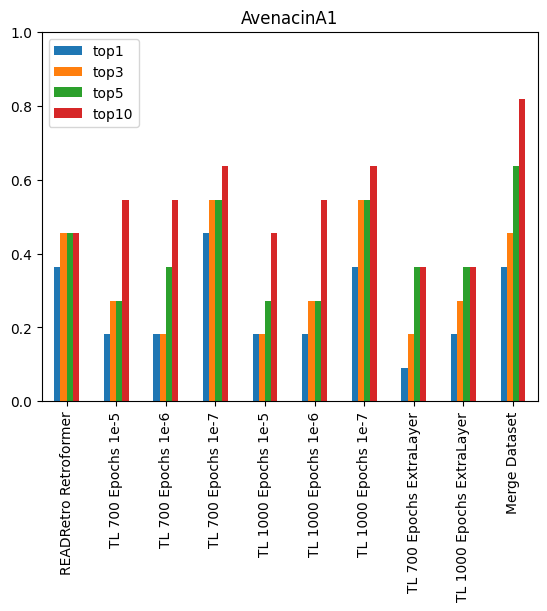

In [3]:
import matplotlib.pyplot as plt

compound = 'avenacinA1'

fig, ax = plt.subplots()

combined_df.T[compound].plot(kind='bar', ax=ax, title=compound[0].upper() + compound[1:])

ax.set_ylim(0, 1)

plt.show()

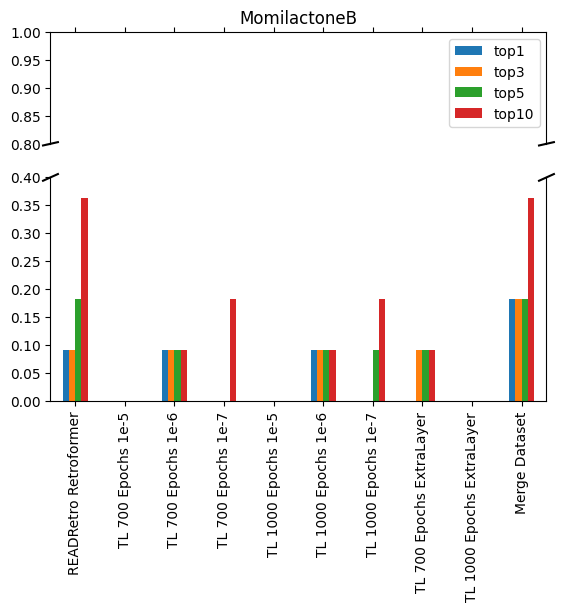

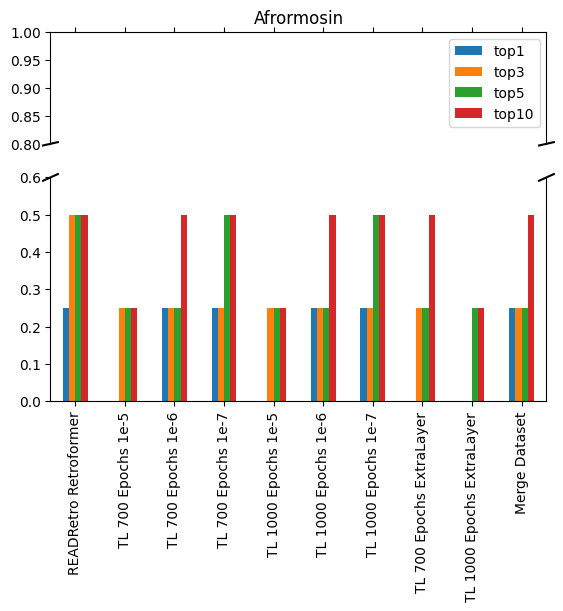

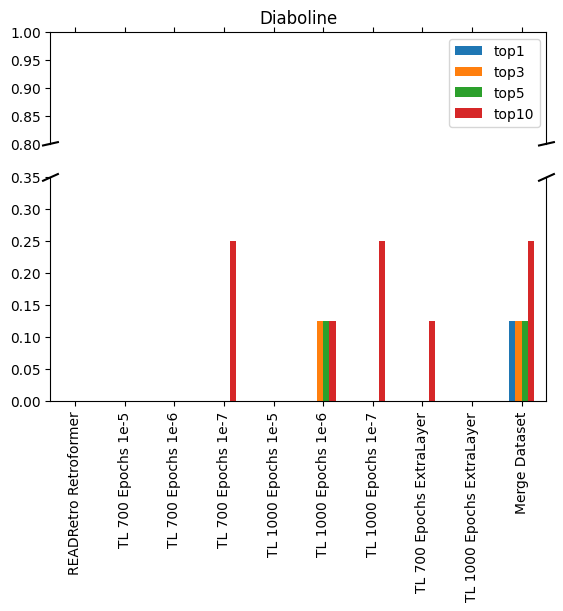

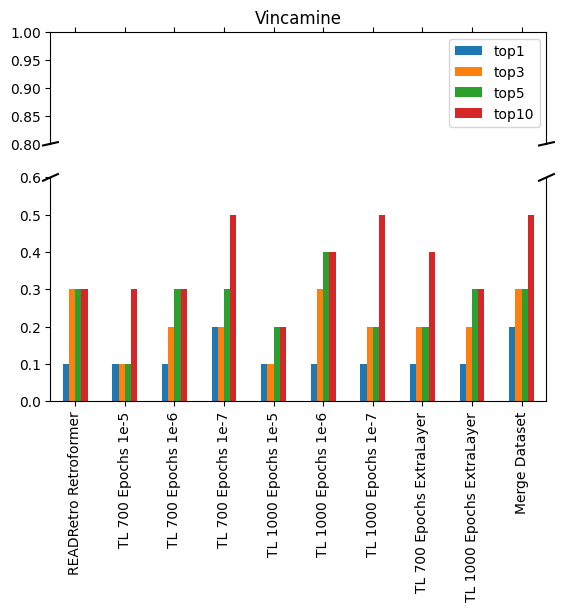

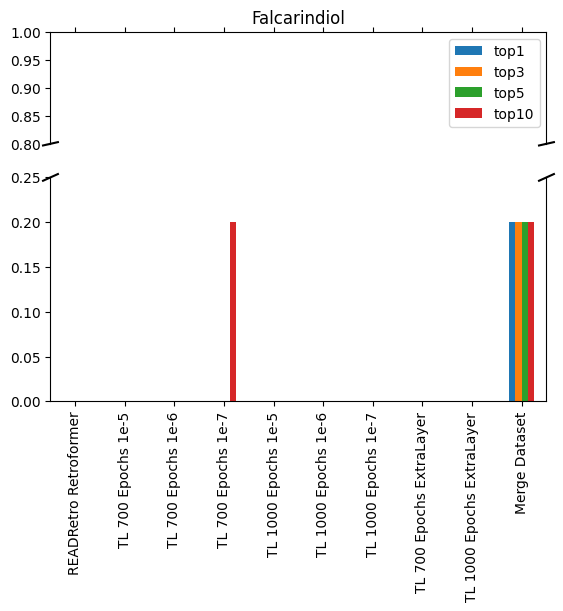

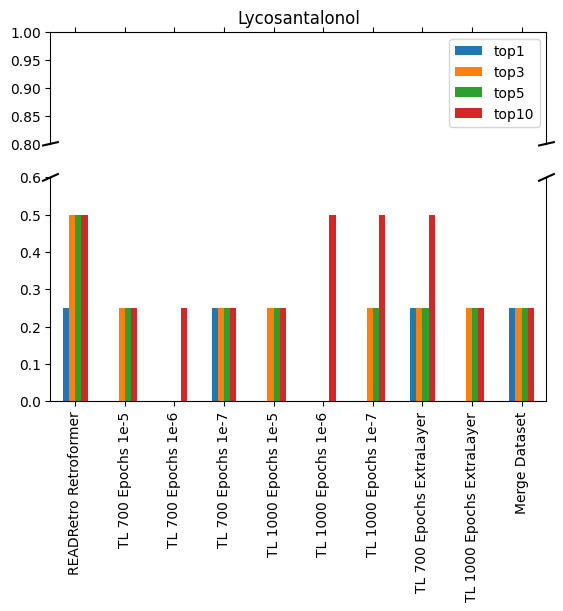

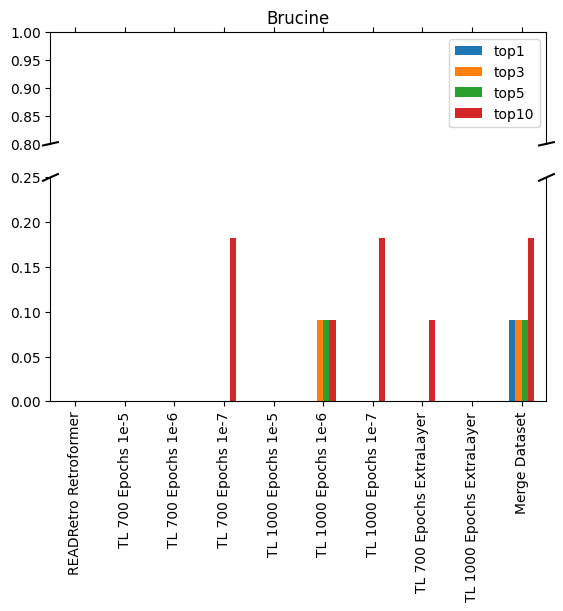

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lim_dict = {
'momilactoneB' :  0.4,
'afrormosin' : 0.6,
'diaboline' : 0.35,
'vincamine' : 0.6,
'falcarindiol' : 0.25,
'lycosantalonol' : 0.6,
'brucine' : 0.25}

for compound, name, value in zip(compounds, lim_dict.keys(), lim_dict.values()):
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [1, 2]})

    combined_df.T[compound].plot(kind='bar', ax=ax1, legend=True, title=compound[0].upper() + compound[1:])
    ax1.set_ylim(0.8, 1)

    combined_df.T[compound].plot(kind='bar', ax=ax2, legend=False)

    if compound == name:
        ax2.set_ylim(0, value)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top')
    ax2.xaxis.tick_bottom()

    d = 0.015
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    plt.show()

In [5]:
combined_df

READRetro Retroformer  TL 700 Epochs 1e-5  \
Compound                                                          
afrormosin     top1                   0.250               0.000   
               top3                   0.500               0.250   
               top5                   0.500               0.250   
               top10                  0.500               0.250   
avenacinA1     top1                   0.364               0.182   
               top3                   0.455               0.273   
               top5                   0.455               0.273   
               top10                  0.455               0.545   
brucine        top1                   0.000               0.000   
               top3                   0.000               0.000   
               top5                   0.000               0.000   
               top10                  0.000               0.000   
diaboline      top1                   0.000               0.000   
               top3                   0.000               0.000   
               top5                   0.000               0.000   
               top10                  0.000               0.000   
falcarindiol   top1                   0.000               0.000   
               top3                   0.000               0.000   
               top5                   0.000               0.000   
               top10                  0.000               0.000   
lycosantalonol top1                   0.250               0.000   
               top3                   0.500               0.250   
               top5                   0.500               0.250   
               top10                  0.500               0.250   
momilactoneB   top1                   0.091               0.000   
               top3                   0.091               0.000   
               top5                   0.182               0.000   
               top10                  0.364               0.000   
vincamine      top1                   0.100               0.100   
               top3                   0.300               0.100   
               top5                   0.300               0.100   
               top10                  0.300               0.300   

                      TL 700 Epochs 1e-6  TL 700 Epochs 1e-7  \
Compound                                                       
afrormosin     top1                0.250               0.250   
               top3                0.250               0.250   
               top5                0.250               0.500   
               top10               0.500               0.500   
avenacinA1     top1                0.182               0.455   
               top3                0.182               0.545   
               top5                0.364               0.545   
               top10               0.545               0.636   
brucine        top1                0.000               0.000   
               top3                0.000               0.000   
               top5                0.000               0.000   
               top10               0.000               0.182   
diaboline      top1                0.000               0.000   
               top3                0.000               0.000   
               top5                0.000               0.000   
               top10               0.000               0.250   
falcarindiol   top1                0.000               0.000   
               top3                0.000               0.000   
               top5                0.000               0.000   
               top10               0.000               0.200   
lycosantalonol top1                0.000               0.250   
               top3                0.000               0.250   
               top5                0.000               0.250   
               top10               0.250               0.250   
momilactoneB   top1                0.091               0.000   
               

In [7]:
import pandas as pd

base_paths = {
    "READRetro Retroformer": "./retroformer_biochem_results/",
    "TL 700 Epochs 1e-5": "./retroformer_transfer_learning_700_10times_lowerLR_results/",
    "TL 700 Epochs 1e-6": "./retroformer_transfer_learning_700_100times_lowerLR_results/",
    "TL 700 Epochs 1e-7": "./retroformer_transfer_learning_700_1000times_lowerLR_results/",
    "TL 1000 Epochs 1e-5": "./retroformer_transfer_learning_1000_10times_lowerLR_results/",
    "TL 1000 Epochs 1e-6": "./retroformer_transfer_learning_1000_100times_lowerLR_results/",
    "TL 1000 Epochs 1e-7": "./retroformer_transfer_learning_1000_1000times_lowerLR_results/",
    "TL 700 Epochs ExtraLayer" : "./retroformer_transfer_learning_700_extralayer_results/",
    "TL 1000 Epochs ExtraLayer" : "./retroformer_transfer_learning_1000_extralayer_results/",
    # "Clean": "./retroformer_clean_results/",
    "Merge Dataset" : "retroformer_merge_dataset_results/"
}

filename = "all_reactionSMILES_pred.txt"

def get_results(base_paths, filename):
    results = {}
    for label, path in base_paths.items():
        compound_name = filename.split('_')[0]
        with open(path + filename, 'r') as f:
            lines = f.read().splitlines()
            if compound_name not in results:
                results[compound_name] = {}
            results[compound_name][label] = {line.split(': ')[0]: float(line.split(': ')[1]) for line in lines}
    return results

all_results = get_results(base_paths, filename)

df = pd.DataFrame(all_results['all'])

df.to_csv('combined_results_all.csv')

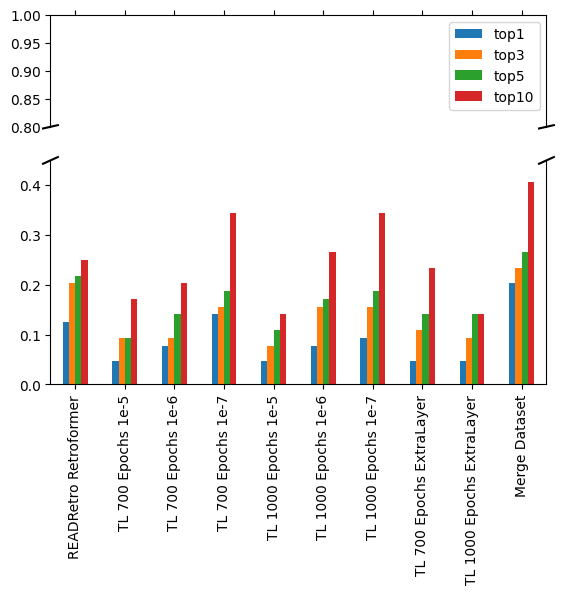

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [1, 2]})

df.T.plot(kind='bar', ax=ax1, legend=True)
ax1.set_ylim(0.8, 1)

df.T.plot(kind='bar', ax=ax2, legend=False)
ax2.set_ylim(0, 0.45)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax2.xaxis.tick_bottom()

d = 0.015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

plt.show()

In [9]:
df

,READRetro Retroformer,TL 700 Epochs 1e-5,TL 700 Epochs 1e-6,TL 700 Epochs 1e-7,TL 1000 Epochs 1e-5,TL 1000 Epochs 1e-6,TL 1000 Epochs 1e-7,TL 700 Epochs ExtraLayer,TL 1000 Epochs ExtraLayer,Merge Dataset
top1,0.125000,0.046875,0.078125,0.140625,0.046875,0.078125,0.09375,0.046875,0.046875,0.203125
top3,0.203125,0.093750,0.093750,0.156250,0.078125,0.156250,0.15625,0.109375,0.093750,0.234375
top5,0.218750,0.093750,0.140625,0.187500,0.109375,0.171875,0.18750,0.140625,0.140625,0.265625
top10,0.250000,0.171875,0.203125,0.343750,0.140625,0.265625,0.34375,0.234375,0.140625,0.406250


In [8]:
import pandas as pd

base_paths = {
    "Clean": "./retroformer_clean_results/",
    "Clean TL700 1000x" : "./retroformer_transfer_learning_700_1000x_clean_results/",
}

filenames = [
    "afrormosin_reactionSMILES_pred.txt",
    "avenacinA1_reactionSMILES_pred.txt",
    "brucine_reactionSMILES_pred.txt",
    "diaboline_reactionSMILES_pred.txt",
    "falcarindiol_reactionSMILES_pred.txt",
    "lycosantalonol_reactionSMILES_pred.txt",
    "momilactoneB_reactionSMILES_pred.txt",
    "vincamine_reactionSMILES_pred.txt"
]

def get_results(base_paths, filenames):
    results = {}
    for label, path in base_paths.items():
        for file in filenames:
            compound_name = file.split('_')[0]
            with open(path + file, 'r') as f:
                lines = f.read().splitlines()
                if compound_name not in results:
                    results[compound_name] = {}
                results[compound_name][label] = {line.split(': ')[0]: float(line.split(': ')[1]) for line in lines}
    return results

all_results = get_results(base_paths, filenames)

columns = ['top1', 'top3', 'top5', 'top10']
dataframes = {}

for compound, compound_data in all_results.items():
    df = pd.DataFrame(index=columns)
    for method, scores in compound_data.items():
        for top in columns:
            df.at[top, method] = scores.get(top, 0.0)
    
    df = df.round(3)
    dataframes[compound] = df

combined_df_clean = pd.concat(dataframes.values(), keys=dataframes.keys(), names=['Compound'])

combined_df_clean.to_csv('combined_results_clean.csv')

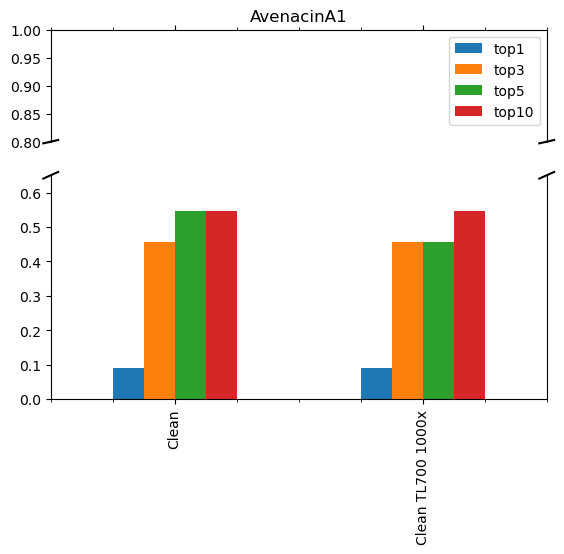

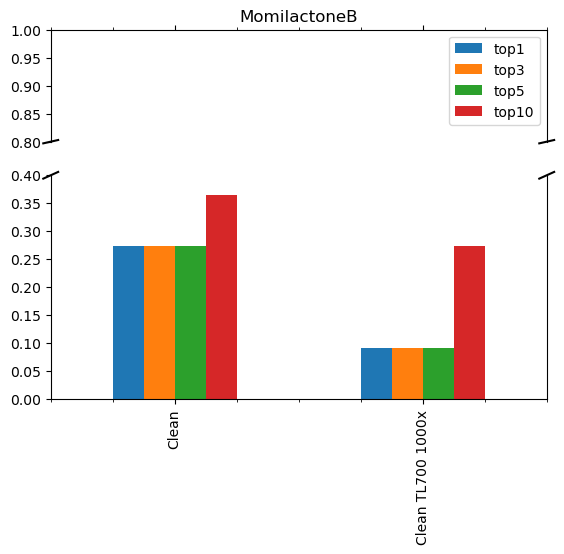

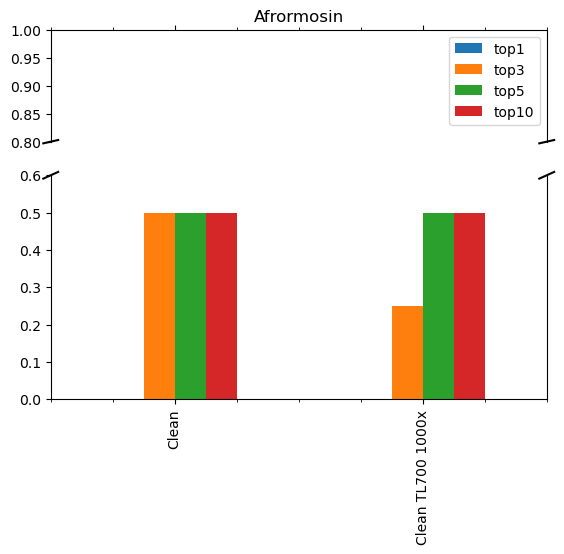

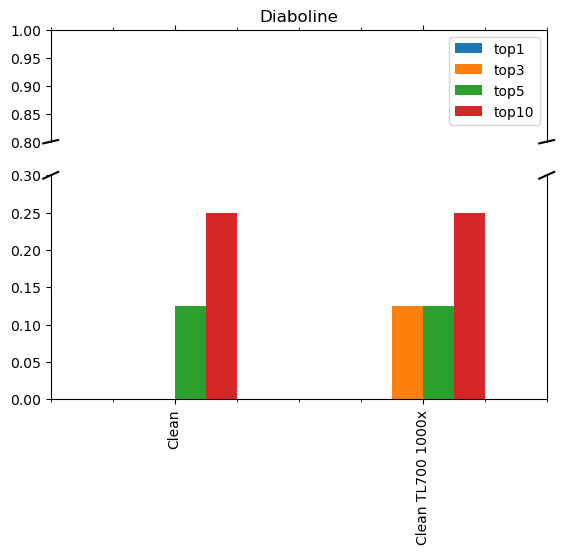

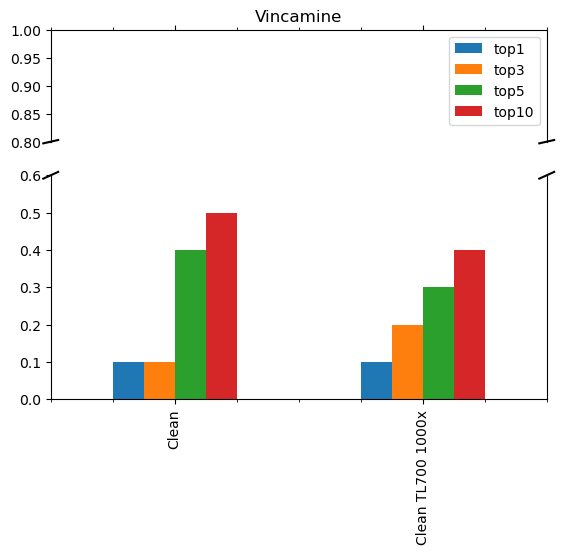

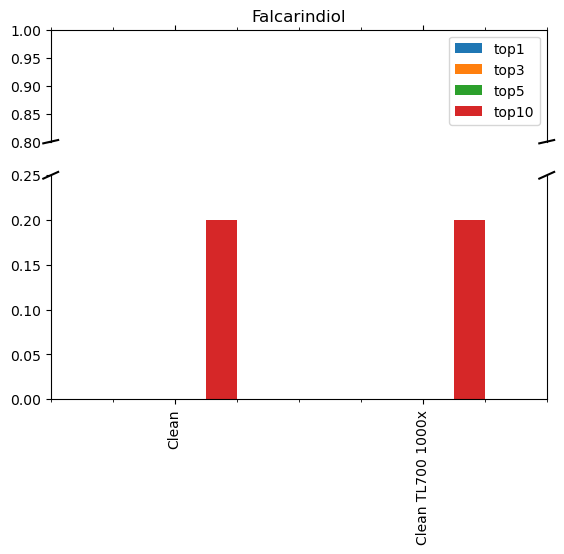

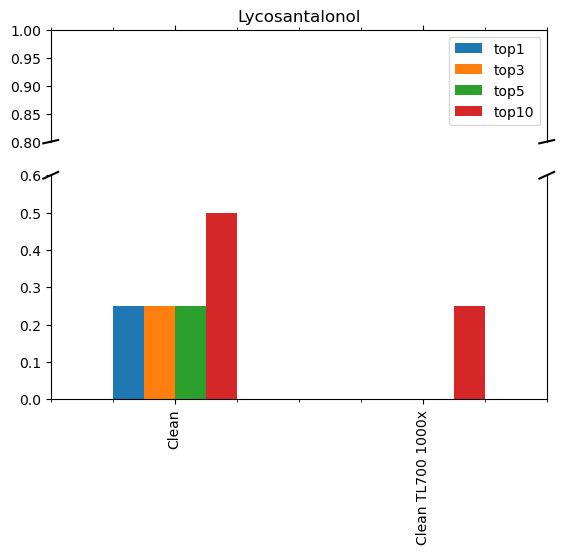

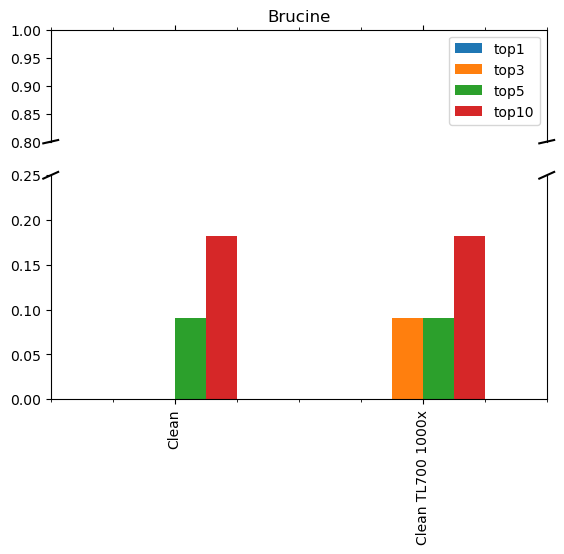

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lim_dict = {'avenacinA1' : 0.65,
'momilactoneB' :  0.4,
'afrormosin' : 0.6,
'diaboline' : 0.3,
'vincamine' : 0.6,
'falcarindiol' : 0.25,
'lycosantalonol' : 0.6,
'brucine' : 0.25}

for compound, name, value in zip(compounds, lim_dict.keys(), lim_dict.values()):
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [1, 2]})

    combined_df_clean.T[compound].plot(kind='bar', ax=ax1, legend=True, title=compound[0].upper() + compound[1:])
    ax1.set_ylim(0.8, 1)

    combined_df_clean.T[compound].plot(kind='bar', ax=ax2, legend=False)

    if compound == name:
        ax2.set_ylim(0, value)

    ax1.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top')
    ax2.xaxis.tick_bottom()

    d = 0.015
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    plt.show()

In [10]:
combined_df_clean

Clean  Clean TL700 1000x
Compound                                      
afrormosin     top1   0.000              0.000
               top3   0.500              0.250
               top5   0.500              0.500
               top10  0.500              0.500
avenacinA1     top1   0.091              0.091
               top3   0.455              0.455
               top5   0.545              0.455
               top10  0.545              0.545
brucine        top1   0.000              0.000
               top3   0.000              0.091
               top5   0.091              0.091
               top10  0.182              0.182
diaboline      top1   0.000              0.000
               top3   0.000              0.125
               top5   0.125              0.125
               top10  0.250              0.250
falcarindiol   top1   0.000              0.000
               top3   0.000              0.000
               top5   0.000              0.000
               top10  0.200              0.200
lycosantalonol top1   0.250              0.000
               top3   0.250              0.000
               top5   0.250              0.000
               top10  0.500              0.250
momilactoneB   top1   0.273              0.091
               top3   0.273              0.091
               top5   0.273              0.091
               top10  0.364              0.273
vincamine      top1   0.100              0.100
               top3   0.100              0.200
               top5   0.400              0.300
               top10  0.500              0.400